# FIT1043 Introduction to Data Science
# Assignment 2
Tuan Muhammad Zafri\
31989632\
29st April 2022

# 1a.Introduction
- This assignment allows us to conduct predictive analysis through machine learning. 
- We are given a data that contains the features and we are required to predict the essay score.
- In order to do this, we are required to do a few steps to build a model that predicts the essay score of a new dataset.
- I am going to follow the assignment specification step-by-step, first by importing the necessary libraries.




# b. Importing the necessary libraries, read the file and describe the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm



# Read the file ('FIT1043-Essay-Features.csv')

In [2]:
essay_features = pd.read_csv('Assignment 2 Files/FIT1043-Essay-Features.csv')
essay_features.head()


,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [3]:
essay_features.shape


(1332, 19)

In [4]:
essay_features.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


# Descriptive statistics of the Essay Features data
- Based on the table above, we can see the mean and max value for every column
- The above table provides us the statistics of the whole batch of essays, in order to have a cleare understanding, I have also use .describe() for essay score 1 and 5
- We can see that the mean for example, features like chars, words, commas, apostrophes and sentences, increases as the score increases.
- There are also features like average words per sentence where the mean decreases as score increases.
- We can also see the count of essayid which is the number of essays that the particular score. 
- Furthermore, we can also see the max of every column accoding to their scores, for example, the maximum sentence for score 1 is 24 whereas it is 47 sentences for essays with score 5.



In [5]:
filt = essay_features.score == 1
essay_features[filt].describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000,18.0
mean,757.388889,559.500000,117.722222,2.277778,3.277778,0.111111,4.708386,5.388889,0.277778,30.000463,116.045875,0.982382,52.388889,0.451260,33.50000,0.296362,148.777778,146.000000,1.0
std,593.229560,505.034099,103.130874,4.599304,1.964555,0.323381,0.279934,5.922429,0.958280,19.189717,102.582238,0.012829,46.532897,0.078626,25.40785,0.059301,110.185702,103.573787,0.0
min,1.000000,169.000000,36.000000,0.000000,2.000000,0.000000,4.068966,0.000000,0.000000,11.000000,35.647059,0.947368,14.000000,0.341463,11.00000,0.215909,48.000000,50.000000,1.0
25%,215.000000,222.500000,47.500000,0.000000,2.000000,0.000000,4.613859,2.000000,0.000000,16.300000,47.151786,0.976248,25.250000,0.392439,14.50000,0.263832,67.250000,67.500000,1.0
50%,543.000000,378.500000,76.500000,0.000000,2.000000,0.000000,4.683333,4.000000,0.000000,22.000000,74.657533,0.983106,34.000000,0.453897,21.00000,0.290841,105.500000,105.000000,1.0
75%,1384.500000,801.000000,172.750000,2.750000,4.000000,0.000000,4.919125,5.750000,0.000000,39.750000,167.071967,0.992445,72.000000,0.474110,49.50000,0.318372,207.250000,207.250000,1.0
max,1679.000000,2254.000000,457.000000,19.000000,9.000000,1.000000,5.257143,24.000000,4.000000,78.000000,454.660793,0.996124,210.000000,0.659091,99.00000,0.465517,490.000000,457.000000,1.0


In [6]:
filt = essay_features.score == 5
essay_features[filt].describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,1023.550000,3423.600000,673.600000,29.866667,14.483333,1.050000,5.091911,30.283333,2.366667,22.944607,668.849980,0.992789,310.183333,0.458314,156.083333,0.229900,682.450000,671.000000,5.0
std,494.919902,860.933573,172.503913,13.511410,8.534063,1.320311,0.205049,8.109613,2.442329,5.584700,171.694543,0.003066,91.862921,0.040280,53.076310,0.033913,83.402115,87.252604,0.0
min,12.000000,1718.000000,325.000000,7.000000,3.000000,0.000000,4.565084,13.000000,0.000000,15.000000,321.658359,0.984946,143.000000,0.371429,80.000000,0.158537,395.000000,382.000000,5.0
25%,708.750000,2881.250000,569.500000,20.750000,9.000000,0.000000,4.965974,24.750000,0.000000,19.199091,566.240296,0.990978,246.000000,0.432033,119.000000,0.208450,647.250000,628.000000,5.0
50%,1027.500000,3268.000000,650.000000,27.500000,13.000000,1.000000,5.082081,30.500000,2.000000,22.440041,644.653252,0.992821,293.000000,0.459772,142.000000,0.231978,712.500000,689.500000,5.0
75%,1439.500000,3809.250000,748.000000,35.500000,18.000000,2.000000,5.222424,36.000000,3.250000,25.627395,741.570790,0.994794,351.250000,0.481323,181.250000,0.246449,750.000000,750.000000,5.0
max,1792.000000,5810.000000,1128.000000,62.000000,51.000000,5.000000,5.681429,47.000000,9.000000,50.230769,1118.989314,0.998252,618.000000,0.581921,355.000000,0.334275,750.000000,750.000000,5.0


| Column Name               | Description                                                                                                                 |
| ------------------------- | --------------------------------------------------------------------------------------------------------------------------- |
| essayid                   | a unique id to identify the essay, we check the count of this column to know the total number of essays                     |
| chars                     | number of characters in the essay, including spaces                                                                         |
| words                     | number of words in the essay                                                                                                |
| commas                    | number of commas in the essay                                                                                               |
| apostrophes               | number of apostrophes in the essay                                                                                          |
| punctuations              | number of punctuations (other than commas, apostrophes, period, questions marks in the essay                                |
| avg_word_length           | the average length of the words in the essay                                                                                |
| sentences                 | number of sentences in the essay, determined by the period (fullstops)                                                      |
| questions                 | number of questions in the essay, determined by the question marks                                                          |
| avg_word_sentence         | the average number of words in a sentence in the essay                                                                      |
| POS                       | total number of Part-of-Speech discovered, for example, noun, pronoun, adjectives and verb etc.                             |
| POS/total_words           | fraction of the POS in the total number of words in the essay                                                               |
| prompt_words              | words that are related to the essay topic                                                                                   |
| prompt_words/total_words  | fraction of the prompt words in the total number of words in the essay                                                      |
| synonym_words             | words that are synonymous                                                                                                   |
| synonym_words/total_words | fraction of the synonymous words in the total number of words in the essay                                                  |
| unstemmed                 | number of words that were not stemmed in the essay                                                                          |
| stemmed                   | number of words that were stemmed (cut to the based word) in the essay                                                      |
| score                     | the rating grade, ranging from 1 – 6, this is the class classification column, we are going to classfy score into 6 classes |

- We are going to need to select features that determine the quality of the essay from this table later
                                                                                                                                                    


# 2.Supervised Learning
## a. Explain supervised machine learning, the notion of labelled data, and the training and test datasets.



### Supervised machine learning
- Supervised machine learning is the development of a prediction model based on both input and output data. In supervised machine learning, all data is labelled, which are the columns in the table of the dataset. The model would then predict the label, in this case, it is the score of the essay based on other features of the essay. 
- The goal is to predict the output(y) from the new input data(x) based on the previous data.
- There are 2 types of models, the regression model and classification model. Regression model outputs a real value or number whereas the classification model outputs a state or category, such as dog or cat.

### Notion of labelled data
- Labelled data is data that comes with features that describes the data. For example, weight and height, dog and cat.
- It is basically the columns of the table in a dataset, in this case it is the essay features.
- We differentiate the input and output using the terms features and label, where features are the input (x or essay features) and label is the output (y/score) that we want to predict. 
- Labelled data is very useful for the machine to learn which and how the inputs would affect the output.

### Training and test datasets
- Both are used to train the machine learning algorithm.
- The training dataset is a dataset of inputs with the predetermined outputs where the algorithm takes in information and learn from it.
- The test dataset is basically used to 'test' the algorithm. It also have a set of inputs and predetermined outputs, but the algorithm uses the inputs to predict the output and the predetermined and predicted outputs are compared.
- A confusion matrix will be used to gather information such as precision, negative predicted value, sensitivity, specificity and accuracy.

## b. Separate the features and the label (Hint: the label, in this case, is the ‘score’)
- Variable X is the independent variable
- Variable y is the dependent variable
- I selected all the features of the essay except the essayid, questions, synonym_words/total_words and score. 
- score will be used as the label
- I droped synonym words over total words based on the statistics in the .describe() table above.<br>
<br>
Furthermore, 
I think that the number of questions in an essay should not be used as a feature because <br>
usually a good essay depends on how the writer asks the questions and not the number of questions.

In [7]:
feature_selected = essay_features.iloc[:,[1,2,3,4,5,6,7,9,10,11,12,13,14,16,17]].values
X = feature_selected
y = essay_features["score"]


## c. Use the sklearn.model_selection.train_test_split function to split your data for training and testing.
- I will split the dataset into training and testing with a ratio of 65:35
- So approximately two thirds of the data is training and one third of the data is testing

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state = 0)

# 3. Classification 
## a. Explain the difference between binary and multi-class classification.
- Binary classification only only categorize the data into 2 classes, it is either true or false based on the condition given. 
- Multi-class classficication categorize data into more than 2 classes, in this case, we categorize into six classes, which is the score of essay from 1 to 6.

## bi. Normalization and scalling of data
- This process occurs before building our model.
- This is because before scalling of data, there may be some features that is relatively large compared to others.
- For example, some are in terms of hundreds while some are in terms of decimals that is less than 1 like 0.111.
- This would cause the predicted output to be more affected by those features that are in terms of hundreds.
- Thus, we need to scale those features down in order for all features to contribute equally to the prediction of the output of our model.


## bii. Choose and use the appropriate normalisation functions available in sklearn.preprocessing and scale the data appropriately.

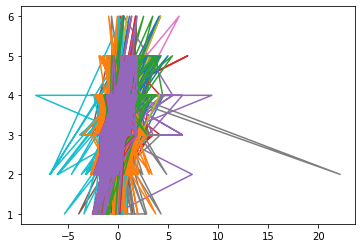

In [9]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
plt.plot(X_train,y_train)

## ci. Describe SVM (in relation to Linear Regression)
- We will use the Support Vector Machine Algorithm(SVM) to build our model in this assignment.
- It is a supervised machine algorithm used for both classification and regression problems. 
- The objective of SVM is to find the hyperplane in an N-dimensional space that classifies the datapoints distinctively.
- In a scatter plot with many points, the SVM will find the best hyperplane that seperates the points into categories.
- The SVM finds this line by taking the extreme points, the points of 2 different categories that are close to each other, and calculate a line which separates the extreme points with a maximised margin between the extreme points. This line is known as the hyperplane.
- The SVM can only do that based on a training dataset that has a predetermined output.

In relation to linear regression
- Linear regression is usually used to solve classification problems whereas SVM can solve both classification and regression problems.
- Linear regression do not maximise the margin whereas the objective of SVM is to find the 'best' margin
- Linear regression is based on statistical approach whereas SVM is based on geometrical properties of the data


## cii. In SVM/SVR, there is something called the kernel. Explain what you understand from it.
- A kernel is a function or a mathemathical equation that helps to separate the data so that the SVM can plot a better hyperplane easier.
- A kernel helps to form the hyperplane in the higher dimension without raising the complexity.
- We can go up to an infinite number of dimensions using kernels.
- The kernel uses a specific equation based on the kernel type specified, such as linear when the data is linearly separable, poly, rbf, sigmoid and others.
- They help to determine the shape of the hyperplane and decision boundary.

## ciii. Write the code to build the model using your training dataset.
- I already dropped the features essayid, questions and synonym words over total words in the dataset in question 2b
- I choose to use SVC to solve this problem
- I used the linear kernal and tune the model using the c parameter
- The decision function shape used is one vs one decision because our problem is a multi-class classification.

In [10]:
linear = svm.SVC(kernel='linear', C=100, decision_function_shape='ovo').fit(X_train, y_train)

## di. Using the testing dataset you created in 2(c) above, conduct the prediction for the ‘score’ (label).

In [11]:
y_pred = linear.predict(X_test)
y_pred

array([4, 3, 3, 2, 3, 4, 4, 4, 2, 4, 4, 3, 4, 3, 3, 4, 3, 4, 4, 4, 2, 3,
       3, 3, 3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 3, 4, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 4,
       4, 4, 4, 4, 3, 3, 4, 5, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 3,
       4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 4, 4, 2, 4, 4, 3, 4,
       2, 3, 3, 4, 3, 4, 3, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 3, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4,
       4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 2, 4, 3,
       4, 4, 4, 2, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 1, 3, 4, 4,
       4, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3,
       4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       3, 3, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 2, 2, 2, 3, 3, 3, 4, 3,
       3, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 3, 5, 4, 2, 3, 4, 3,
       3, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 3,

In [12]:
# the mean accuracy of the predicted data
accuracy_lin = linear.score(X_test, y_test)
accuracy_lin


0.6616702355460385

## dii. Display the confusion matrix

In [13]:
cm= confusion_matrix(y_test, y_pred)
cm
# from sklearn.metrics import classification_report
# cp = classification_report(y_test, y_pred)
# cp

array([[  1,   1,   0,   0,   0,   0],
       [  0,  16,  18,   0,   0,   0],
       [  0,   4, 138,  53,   0,   0],
       [  0,   0,  57, 152,   2,   0],
       [  0,   0,   1,  20,   2,   0],
       [  0,   0,   0,   2,   0,   0]])

## Explain the confusion matrix
- Confusion matrix is a tool to measure performance for machine learning classification problem which output can be two or more classes. It is a table with (nxn) different combinations of predicted and actual values, where n is the number of classes
- It allows us to measure the precision, recall, F-score, specificity and accuracy of our model.
- With these calculated values, we can know how to improve our model based on the problem.

In [14]:
from sklearn.metrics import classification_report
cp = classification_report(y_test, y_pred)
cp

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       1.00      0.50      0.67         2\n           2       0.76      0.47      0.58        34\n           3       0.64      0.71      0.67       195\n           4       0.67      0.72      0.69       211\n           5       0.50      0.09      0.15        23\n           6       0.00      0.00      0.00         2\n\n    accuracy                           0.66       467\n   macro avg       0.60      0.41      0.46       467\nweighted avg       0.66      0.66      0.65       467\n'

## diii. Explain Quadratic Weighted Kappa (QWK). 
- QWK measures the aggrement of two ratings, the score ranges from -1 to 1 where 1 means a perfectly predicted output based on the actual.
- The QWK is used to find out the accuracy of our model output based on a confusion matrix.
- It is different from linear weighted kappa in a sense that difference between each categories are not weighted equal, for example, we will have a less score if our prediction is 5 when actual is 3, as compared to prediction is 4 in this same case.




In [15]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_pred,y_test)


0.4219844266532973

## Explain the QWK score
- The score of 0.412 is not a really good score but it is stil a moderate score 
- The actual and predicted value have moderate agreement.

# 4a. Read the ‘FIT1043-Essay-Features-Submission.csv’ file and use the model you built earlier to predict the ‘score’.

In [20]:
essay_submit = pd.read_csv('Assignment 2 Files/FIT1043-Essay-Features-Submission.csv')
# select the same features and then normalize the data
feature_selected = essay_submit.iloc[:,[1,2,3,4,5,6,7,9,10,11,12,13,14,16,17]].values
X = feature_selected
sc = StandardScaler().fit(X)
X = sc.transform(X)

# 4b.

In [17]:
y_pred = linear.predict(X)
y_pred

array([4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3, 3, 4, 4, 2, 3, 3, 4, 3, 3,
       4, 4, 3, 4, 3, 4, 2, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 4, 2, 4, 4,
       1, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 3, 5, 2, 3, 3, 4, 3, 3, 5, 4,
       5, 3, 4, 4, 4, 3, 2, 4, 2, 3, 3, 4, 4, 3, 2, 4, 3, 4, 4, 2, 4, 4,
       2, 3, 4, 3, 3, 4, 2, 3, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3,
       4, 3, 3, 3, 3, 4, 4, 3, 2, 2, 4, 5, 3, 3, 2, 4, 3, 4, 3, 3, 4, 4,
       4, 3, 3, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3,
       3])

# 4c.Output your prediction to a CSV file that contains 2 columns, ‘essayid’ and ‘score’. It should have a total of 200 lines

In [18]:
submit_csv=pd.read_csv('Assignment 2 Files/31989632-Tuan_Muhammad_Zafri-1.csv',index_col=0)

submit_csv['score']=y_pred.tolist()
submit_csv

,score
essayid,
1623,4
1143,3
660,3
1596,4
846,4
...,...
1226,3
862,4
1562,4


In [19]:
submit_csv.to_csv('Assignment 2 Files/31989632-Tuan_Muhammad_Zafri-1.csv')


# Conclusion
- I learned how to build a machine learning model step-by-step
- We need to split data into features and labels.
- We also need to split dataset into test and train dataset.
- Before building the model, we need to normalize the data so that all features contribute equally.
- I learned about SVM and how to use it to solve a multi-class classification problem.
- I also learned that different kernel suits better to different datasets and problems.
- I also learned about multi-class confusion matrix and QWK scores that evaluate our model.
- Finally, I got to experience on how to submit my files to Kaggle and get to know how did I do compared to my classmates.
